<br>
<center>
<img src="https://seaborn.pydata.org/_images/logo-wide-lightbg.svg" width="50%">
</center>
<br>

# Seaborn

## ¿Qué es Seaborn?

Seaborn es una librería de visualización de datos basada en MatPlotLib. Los gráficos que produce Seaborn no son únicamente muy atractivos, sino que resultan muy funcionales. Seaborn ha sido pensada para el fácil análisis estadístico de los datos. Por esta razón, encontrarás que la librería incluye una importante colección de funciones de análisis estadístico.

## ¿Cómo se instala?

Para ver instrucciones generales de instalación puedes visitar la página oficial. Allí encontrarás indicaciones específicas para tu sistema operativo y/o tu gestor de entornos y paquetes. Aquí supondremos que estás trabajando en tu entorno de conda, así que el comando que debes teclear en la terminal es:

```bash
conda install -c conda-forge seaborn
```

## ¿Cómo se usa?

### Importando Seaborn

Seaborn reconoce como argumentos de entrada objetos de tipo 'pandas.DataFrame' y 'numpy.ndarray'. Por ese motivo importaremos la librería Pandas y Numpy en este tutorial junto con Seaborn:

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

### 3 Clusters en 2 dimensiones

¿Recuerdas los k-means clusters que calculaste en [uno de los retos de la semana 2](../semana_2/reto_3.ipynb)? Tomemos esa distribución de puntos que hemos construido agrupados en tres clusters para hacer una representación gráfica en la que incluir las distribuciones marginales de cada cluster.

Esta era la gráfica que representamos en el reto para los 3 clusters:

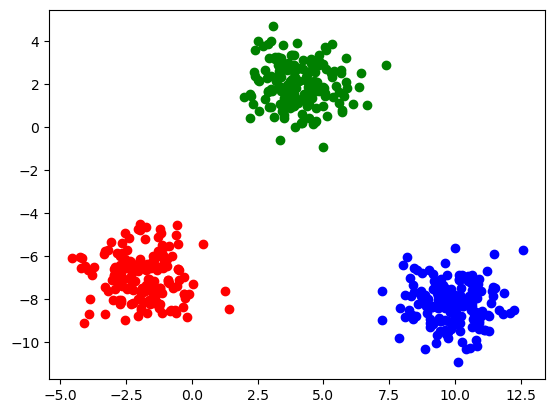

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

dataset, membership = datasets.make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.0)

plt.scatter(dataset[(membership==0),0], dataset[(membership==0),1], color='r')
plt.scatter(dataset[(membership==1),0], dataset[(membership==1),1], color='g')
plt.scatter(dataset[(membership==2),0], dataset[(membership==2),1], color='b')
plt.show()

Construyamos ahora un DataFrame de Pandas con los datos anteriores, pero hacer una de las columnas no numérica, diremos que el cluster 0 corresponde a la especie 'A', el cluster 1 a la especie 'B' y el cluster 2 a la especie 'C':

In [3]:
cluster_a_especie = {0:'A', 1:'B', 2:'C'}
especies = [cluster_a_especie[ii] for ii in membership]
df = pd.DataFrame({'Atributo 1':dataset[:,0], 'Atributo 2':dataset[:,1], 'Especie':especies})

In [4]:
df

,Atributo 1,Atributo 2,Especie
0,10.285718,-8.095109,C
1,3.054831,1.655863,B
2,-2.479692,-7.519096,A
3,-1.424772,-8.176771,A
4,-4.570260,-6.093050,A
...,...,...,...
495,10.171796,-9.469367,C
496,8.942113,-8.643645,C
497,4.709506,0.885289,B
498,2.946298,0.921370,B


Y hagamos uso de la función `jointplot`:

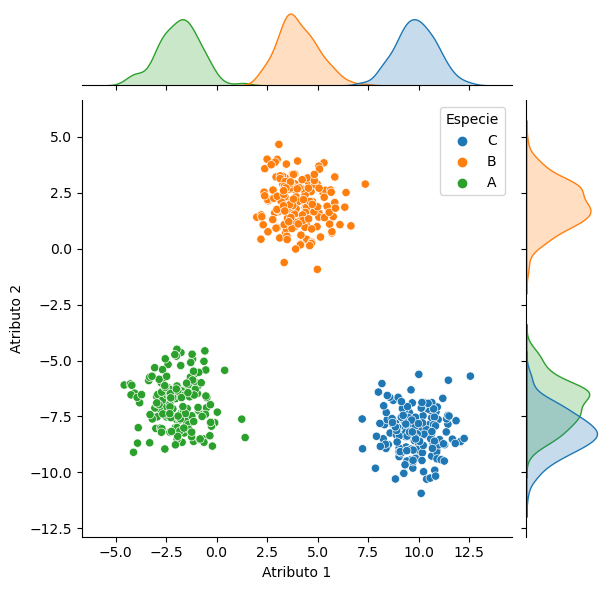

In [6]:
sns.jointplot(data=df, x="Atributo 1", y="Atributo 2", hue="Especie")
plt.show()

### 5 clusters en 4 dimensiones

Supongamos ahora que en lugar de tener una distribución de datos correspondiente a 2 atributos de 3 especies, tenemos 4 atributos de 5 especies. O en términos de clusters y dimensiones, hemos encontrado 5 clusters en un espacio 4-dimensional. ¿Cómo vamos a representar eso gráficamente? Seaborn nos ofrece una herramienta sencilla para hacer una primera visualización de todas las proyecciones bi-dimensionales posibles distintas junto con las distribuiones marginales de cada cluster. Veamos el siguiente ejemplo.

Construimos en primer lugar los datos que vamos a representar:

In [7]:
dataset, membership = datasets.make_blobs(n_samples=500, n_features=4, centers=5, cluster_std=1.0)

Y almacenamos los datos en un DataFrame de Pandas con el nombre apropiado de los atributos y las especies:

In [10]:
cluster_a_especie = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E'}
especies = [cluster_a_especie[ii] for ii in membership]
df = pd.DataFrame({'Atributo 1':dataset[:,0],
                   'Atributo 2':dataset[:,1],
                   'Atributo 3':dataset[:,2],
                   'Atributo 4':dataset[:,3],
                   'Especie':especies})

Hagamos uso ahora de la función `pairplot`:

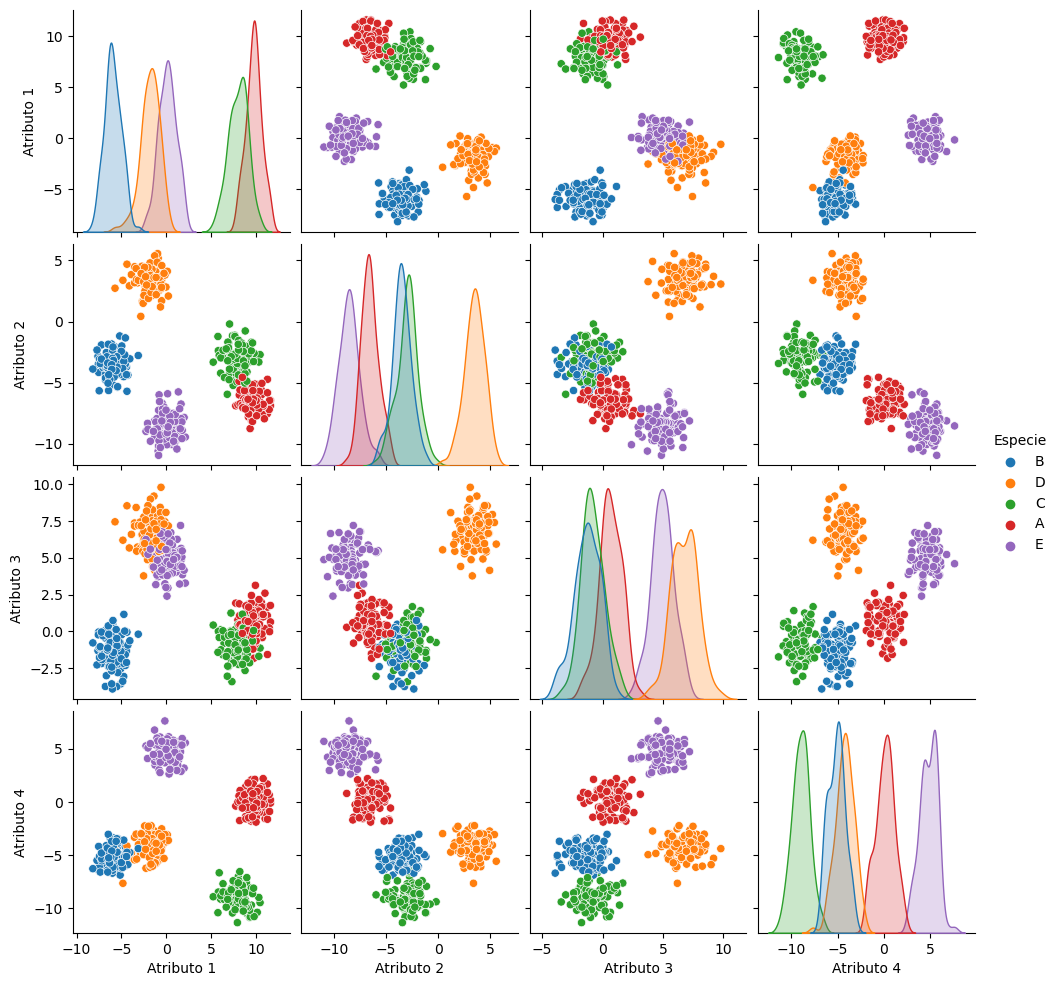

In [11]:
sns.pairplot(data=df, hue="Especie")
plt.show()